#### Factor Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

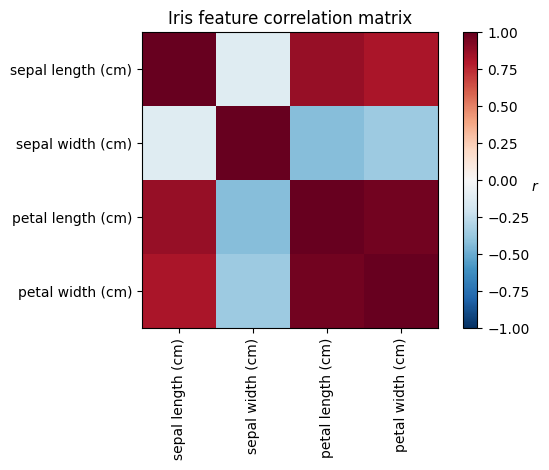

In [2]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
feature_names = data["feature_names"]

ax = plt.axes()
im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()



 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


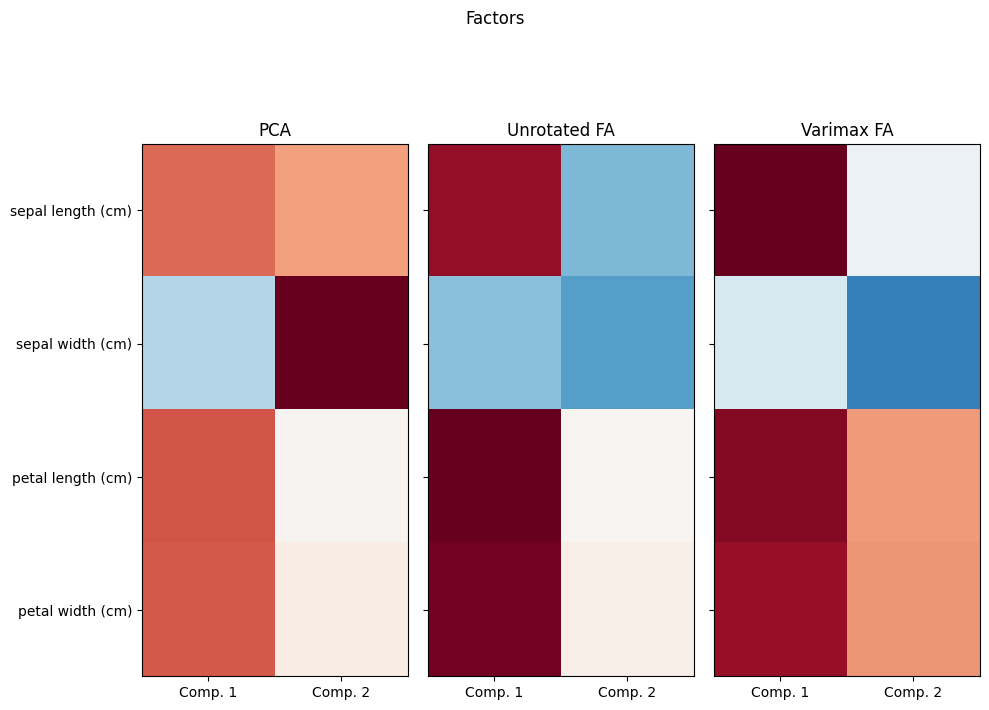

In [3]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8), sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    ax.set_yticklabels(feature_names)
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [23]:
from pandas import read_csv, Series, DataFrame
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
food = read_csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv", index_col=0)
food.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


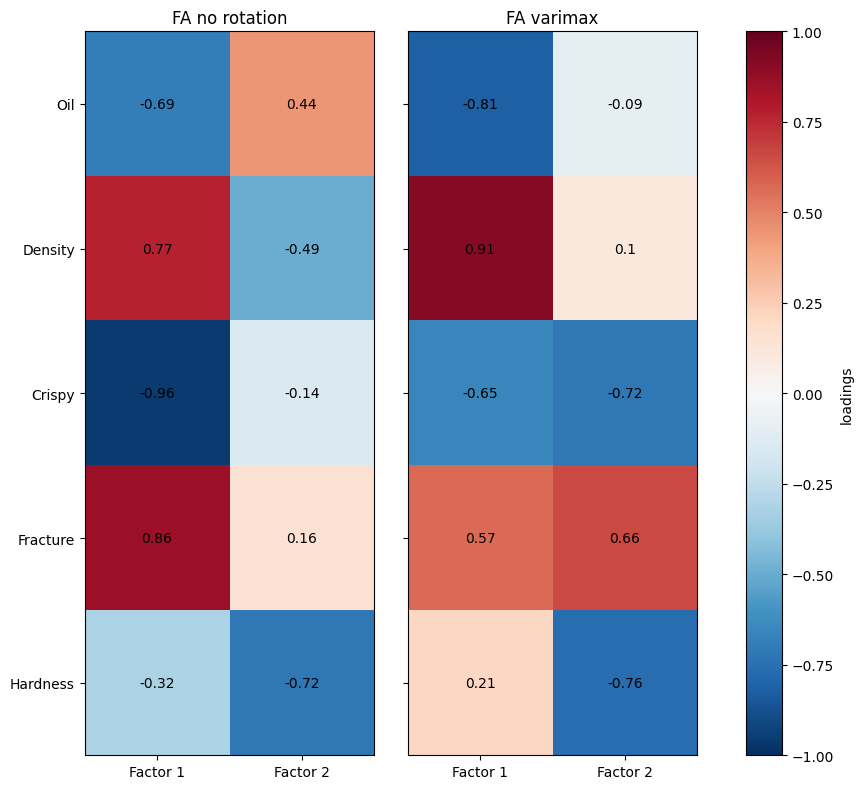

In [4]:
X = StandardScaler().fit_transform(food)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(food.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(food.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

<Axes: ylabel='Uniqueness'>

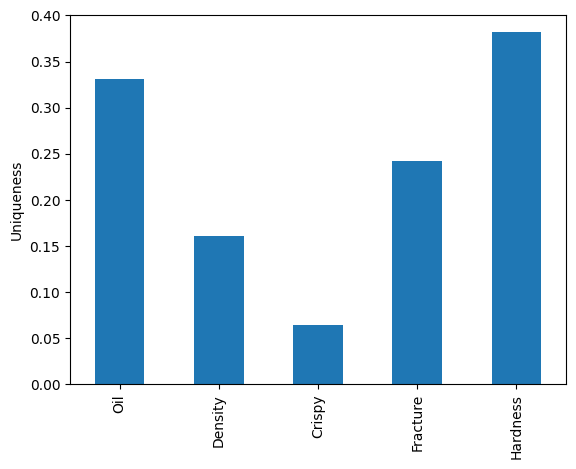

In [5]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=food.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

<Axes: ylabel='communality'>

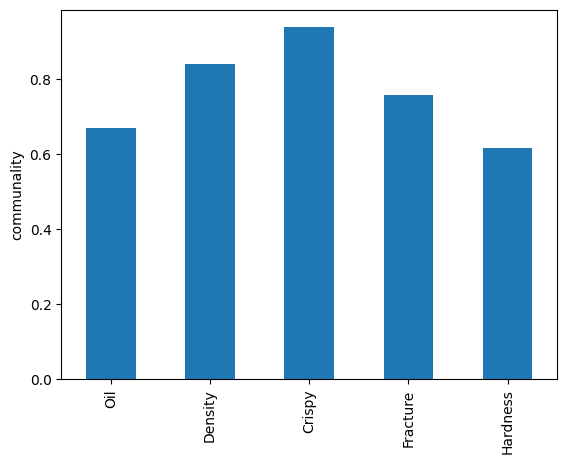

In [6]:
    # Communality
communality = Series(np.square(fa.components_.T).sum(axis=1), index=food.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

In [7]:
# the word 'lambda' is reserved for a python-operator, so we use the underscore at the end
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

/tmp/ipykernel_30056/1560558940.py:11: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 1000x800 with 3 Axes> which fig.colorbar is called on.
  fig.colorbar(im, ax=ax, location='right')


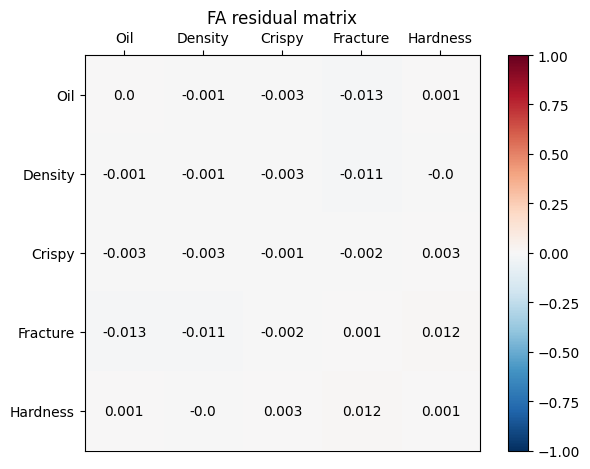

In [8]:
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
ax.set_xticks(range(5))
ax.set_xticklabels(food.columns)
ax.set_yticks(range(5))
ax.set_yticklabels(food.columns)
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

fig.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

Chi-square value: 154.99359917496693
P-value: 3.4929639319471024e-28
KMO Model: 0.7088776872864254


/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


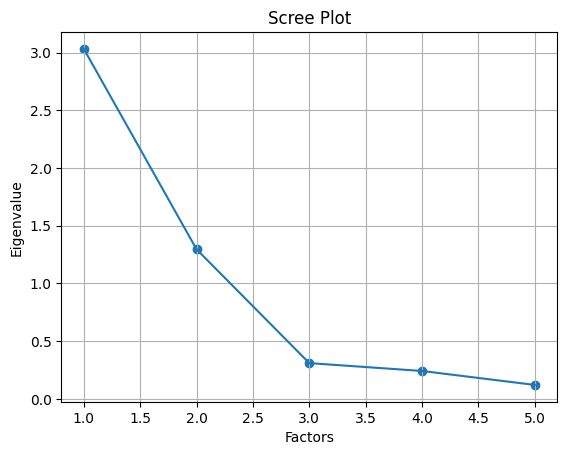

In [ ]:
# Install the factor_analyzer package
# !pip install factor_analyzer

import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load data
# data = pd.read_csv('your_data.csv')
data = food

# Apply Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f'Chi-square value: {chi_square_value}\nP-value: {p_value}')

# Apply KMO test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data)
print(f'KMO Model: {kmo_model}')

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation="varimax")
fa.fit(data)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



In [14]:
# Perform factor analysis with the determined number of factors
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(data)

# Get factor loadings
loadings = fa.loadings_
print(loadings)

# Get variance of each factor
var = fa.get_factor_variance()
print(var)

eig = fa.get_eigenvalues()
print(eig)
# Get factor scores
# factor_scores = fa.transform(data)
# print(factor_scores)

[[-0.82249652 -0.02273619]
 [ 0.91112438  0.02768908]
 [-0.74779315  0.62689315]
 [ 0.65387749 -0.56628574]
 [ 0.09527362  0.76937141]]
(array([2.5024756 , 1.30689055]), array([0.50049512, 0.26137811]), array([0.50049512, 0.76187323]))
(array([3.03121317, 1.29570576, 0.31004934, 0.24192008, 0.12111165]), array([ 2.84191518e+00,  9.67447982e-01,  1.57798837e-02, -1.13922400e-06,
       -1.57757635e-02]))


/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### example

In [ ]:
df = pd.read_csv('./data/bfi.csv', index_col=0)
df.columns

df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

In [16]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468383

In [25]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235382, 0.0)

In [26]:
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(df)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

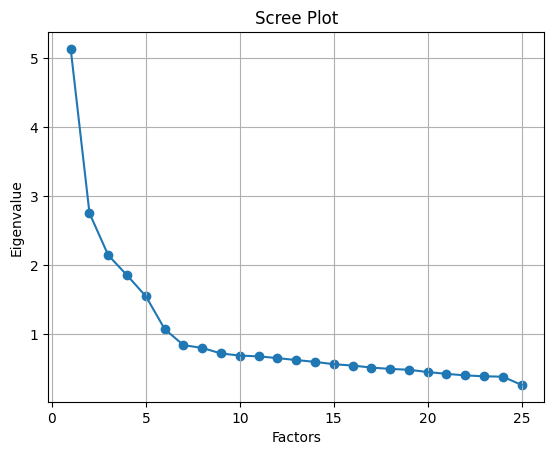

In [27]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [28]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)
efa_result= pd.DataFrame(fa.loadings_, index=df.columns)
efa_result

/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,2,3,4,5
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


<Axes: >

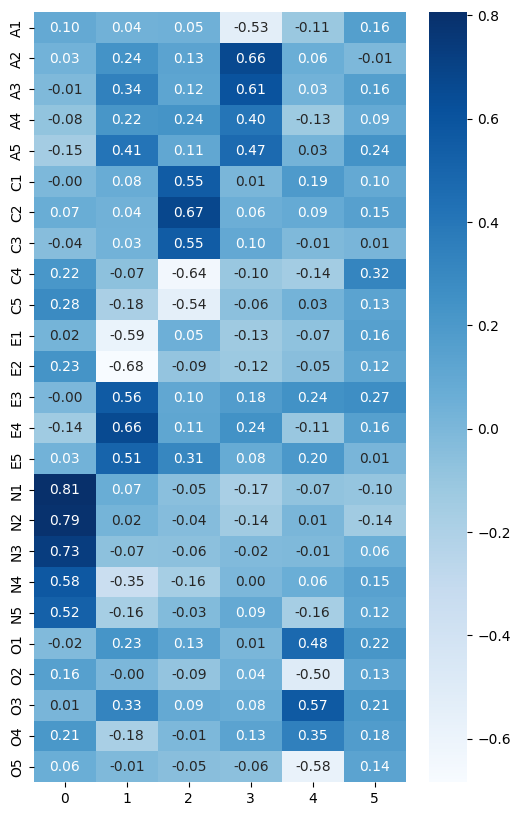

In [29]:
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [32]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax") #ml : 최대우도 방법
fa.fit(df)

/home/augustine77/.cache/pypoetry/virtualenvs/sim-0TBU-pA2-py3.11/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [33]:
fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())
#행, 열 이름 설정
df1.index = ['SS Loadings', 'Proportion Var','Cumulative Var']
df1

,0,1,2,3,4,5
SS Loadings,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proportion Var,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Cumulative Var,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053
